In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
ruta = "C:/Users/mico1/OneDrive/Favorites/Documents/GitHub/Examen2/Proyecto2/datasets/chilean_recipes.csv"
df = pd.read_csv(ruta)
df

,recipe name,preparation time,min_portion,max_portion,ingredients,steps
0,Ajiaco chileno,40.0,3.0,4.0,"['300 grs de carne asada, puede ser más', '2 c...",['1-Cortamos la carne en tiras y las papas a l...
1,Alfajores chilenos,40.0,20.0,NaN,"['1 1/2 taza de harina cernida', '5 yemas', '1...",['1-Colocar la harina en un bol y añadir las y...
2,Alfajores de Maicena,30.0,20.0,NaN,"['125 grs. margarina', '150 grs. azúcar flor (...","['1-Precalentar el horno a 350°F (180°C)', '2-..."
3,Aliño completo,5.0,NaN,NaN,"['1 cucharada de ajo en polvo', '1 cucharada d...",['1-Idealmente usar un mortero y moler todos l...
4,Anticuchos de carne y vegetarianos,30.0,4.0,6.0,['1/2 kilo de carne para la parrilla (lomo vet...,['1-Existe la opción de adobar la carne por un...
...,...,...,...,...,...,...
112,Tortilla de zanahoria,18.0,2.0,NaN,"['4 zanahorias sin cáscara', '1/2 unidad de ce...",['1-En una sartén freír la cebolla con la cuch...
113,Tortilla de zapallo italiano,25.0,2.0,NaN,"['2 zapallos italianos', '1/2 unidad de ceboll...","['1-Lavar los zapallos italianos, cortar los e..."
114,Turrón de vino,0.0,6.0,8.0,"['1 taza de azúcar', '1/2 taza de vino tinto',...","['1-En una olla colocar el azúcar, gotas de li..."
115,"Vaina, cocktail chileno",10.0,1.0,NaN,"['50 cc de vino añejo u oporto', '30 cc de Cog...",['1-Mezclar todos los ingredientes menos la ca...


In [2]:
# Calcular el promedio de max_portion (ignorando NaN)
mean_max_portion = df['max_portion'].mean()
print(f"Promedio de max_portion: {mean_max_portion:.2f}")

# Rellenar los valores faltantes con el promedio
df['max_portion'] = df['max_portion'].fillna(mean_max_portion)

Promedio de max_portion: 9.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recipe name       117 non-null    object 
 1   preparation time  117 non-null    float64
 2   min_portion       101 non-null    float64
 3   max_portion       117 non-null    float64
 4   ingredients       117 non-null    object 
 5   steps             117 non-null    object 
dtypes: float64(3), object(3)
memory usage: 5.6+ KB


In [4]:
# Calcular el promedio de min_portion (ignorando NaN)
mean_min_portion = df['min_portion'].mean()
print(f"Promedio de min_portion: {mean_min_portion:.2f}")

# Rellenar los valores faltantes con el promedio
df['min_portion'] = df['min_portion'].fillna(mean_min_portion)

Promedio de min_portion: 8.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recipe name       117 non-null    object 
 1   preparation time  117 non-null    float64
 2   min_portion       117 non-null    float64
 3   max_portion       117 non-null    float64
 4   ingredients       117 non-null    object 
 5   steps             117 non-null    object 
dtypes: float64(3), object(3)
memory usage: 5.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preparation time,117.0,37.521368,33.675070,0.0,10.000000,35.000000,50.000000,150.0
min_portion,117.0,8.722772,6.811652,1.0,4.000000,8.000000,12.000000,40.0
max_portion,117.0,9.428571,2.744004,3.0,9.428571,9.428571,9.428571,30.0


C:\Users\mico1\AppData\Local\Temp\ipykernel_20028\857918831.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_recipes, x='recipe name', y='preparation time', palette='viridis')


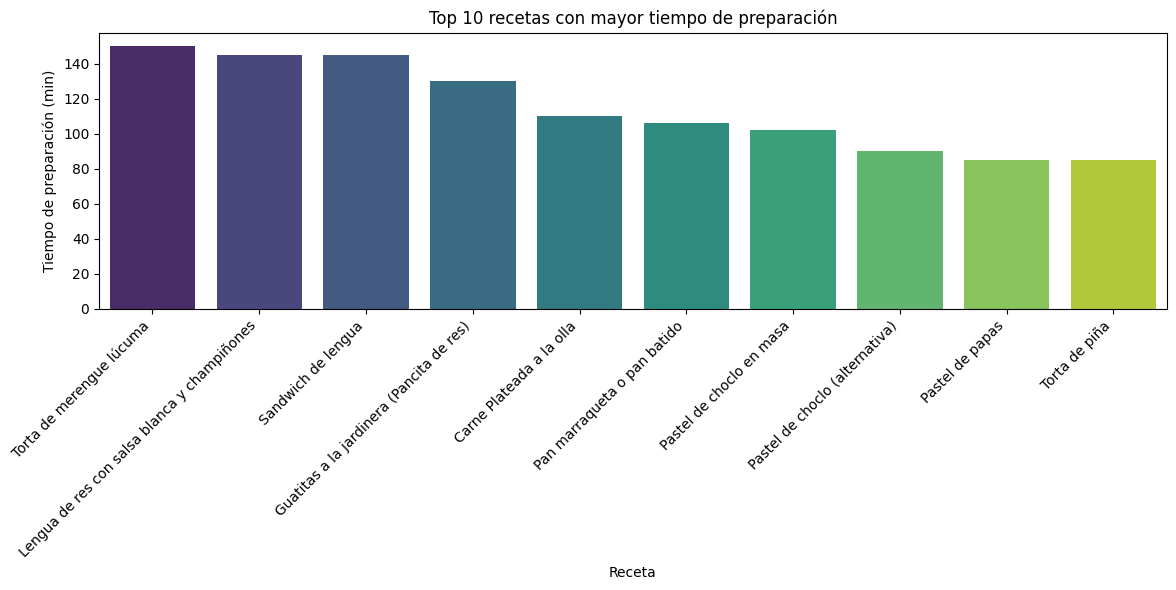

In [7]:


# Gráfico de barras: Top 10 recetas con mayor tiempo de preparación
top_recipes = df.sort_values('preparation time', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_recipes, x='recipe name', y='preparation time', palette='viridis')
plt.title('Top 10 recetas con mayor tiempo de preparación')
plt.xlabel('Receta')
plt.ylabel('Tiempo de preparación (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

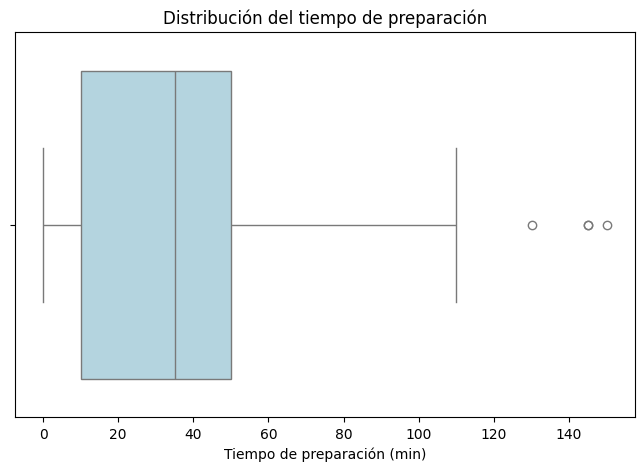

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['preparation time'], color='lightblue')
plt.title('Distribución del tiempo de preparación')
plt.xlabel('Tiempo de preparación (min)')
plt.show()

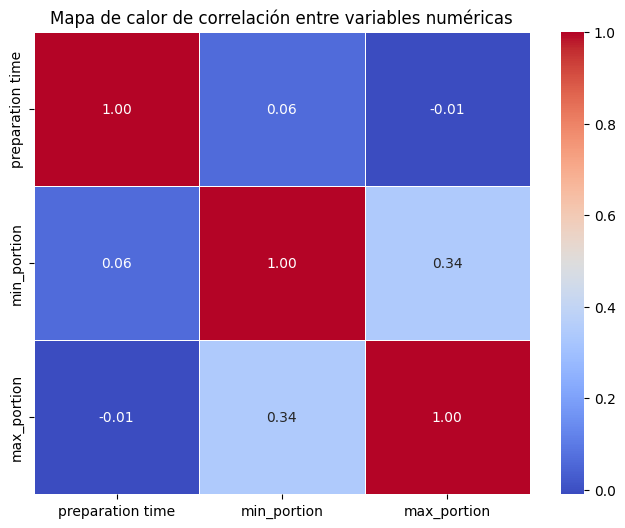

In [9]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include='number')

# Calcular la matriz de correlación
corr = numeric_cols.corr()

# Graficar el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()